#TensorFlow


1.	Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность

In [2]:
import setuptools.dist
from keras.datasets import fashion_mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [4]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

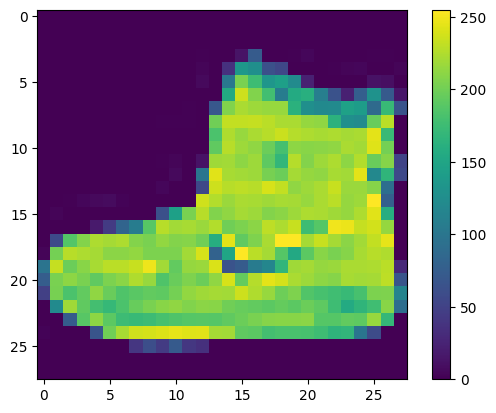

In [7]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

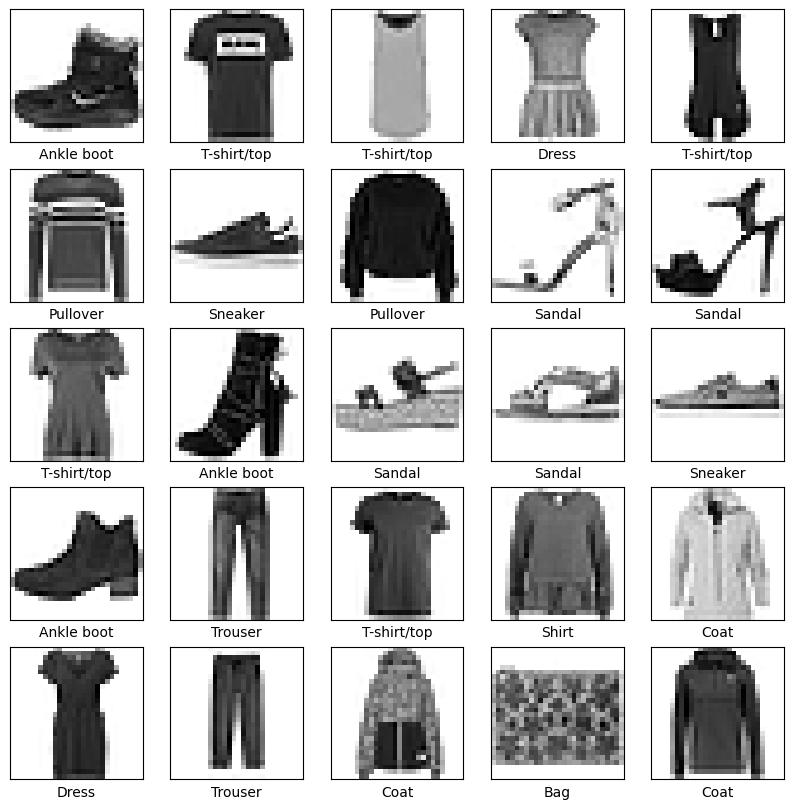

In [9]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

In [10]:
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [11]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

# Dropout отключает нейроны для предотвращения переобучения
# 4 слоя(256, 128, 64, 10) нейронов
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dense(10)
])

model2.summary()

C:\Users\rylon\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)

In [12]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.compile(optimizer=Adam(learning_rate=0.0005),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# если обучение останавливается раньше, модель будет возвращаться к состоянию с наилучшими весами, что может улучшить её производительность.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 15 прогонов, есть условие остановки, 256 элементов одновременно обрабатываются
model2.fit(X_train, y_train,
           epochs=15,
           batch_size=256,
           validation_data=(X_test, y_test),
           callbacks=[early_stopping])
test_loss2, test_acc2 = model2.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy MODEL 1:', test_acc)
print('\nTest accuracy MODEL 2:', test_acc2)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7208 - loss: 0.8271 - val_accuracy: 0.8377 - val_loss: 0.4683
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8533 - loss: 0.4321 - val_accuracy: 0.8391 - val_loss: 0.4454
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8606 - loss: 0.4004 - val_accuracy: 0.8539 - val_loss: 0.4130
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8702 - loss: 0.3633 - val_accuracy: 0.8489 - val_loss: 0.4190
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8759 - loss: 0.3490 - val_accuracy: 0.8654 - val_loss: 0.3783
313/313 - 1s - 2ms/step - accuracy: 0.8654 - loss: 0.3783
Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7233 - loss: 0.8991 - val_accuracy: 0.8377 - val_loss: 0.5691
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8596 - loss: 0.4620 - val_accuracy: 0.8544 - val_loss: 0.4604
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/s

In [14]:
probability_model = Sequential([
    model,
    tf.keras.layers.Softmax()
])

probability_model2 = Sequential([
    model2,
    tf.keras.layers.Softmax()
])
predictions = probability_model.predict(X_test)
predictions2 = probability_model2.predict(X_test)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([3.2694484e-06, 4.4015775e-07, 6.9839416e-06, 8.7545304e-06,
       1.3596795e-05, 3.1964153e-02, 1.6940650e-05, 5.0064128e-02,
       1.1652855e-03, 9.1675639e-01], dtype=float32)

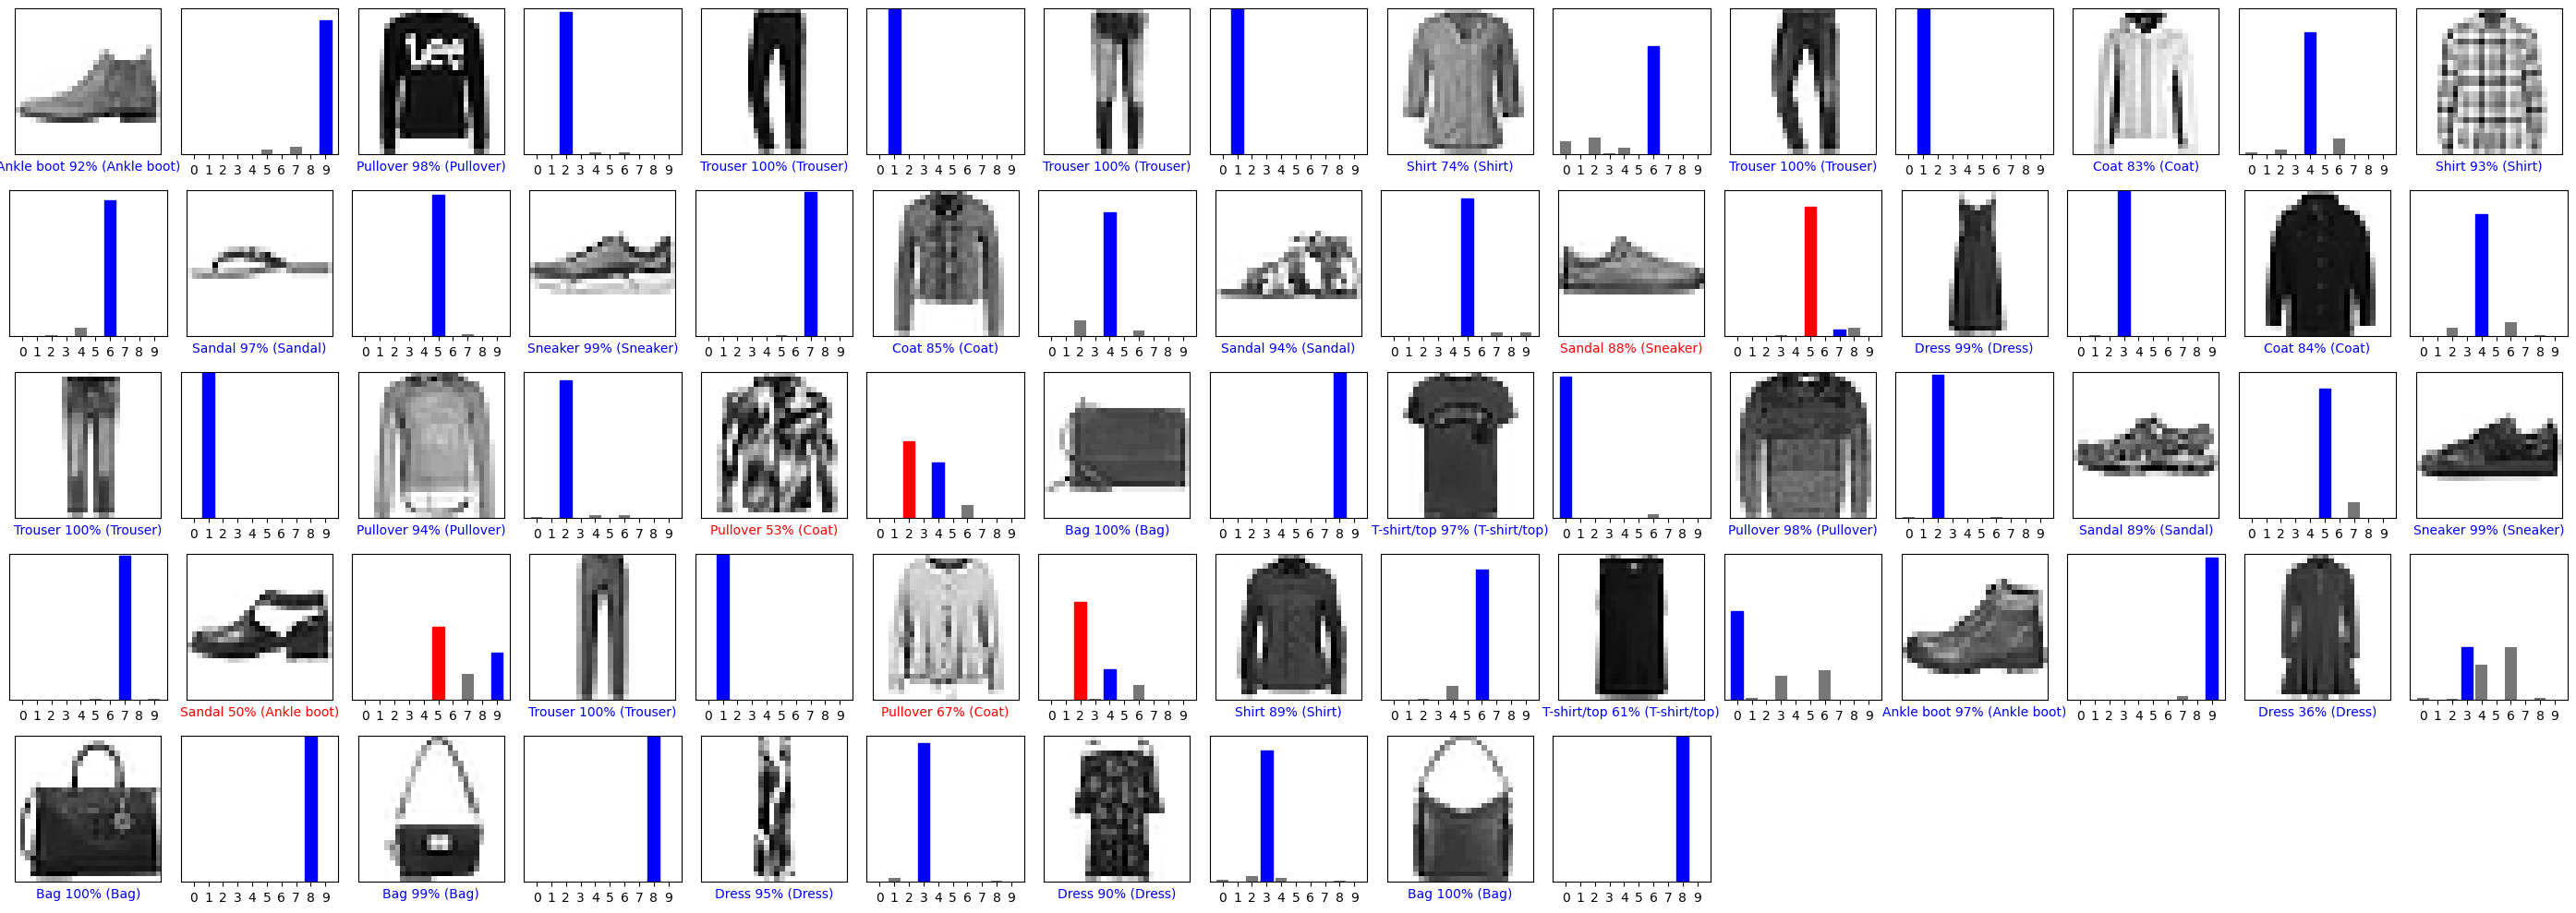

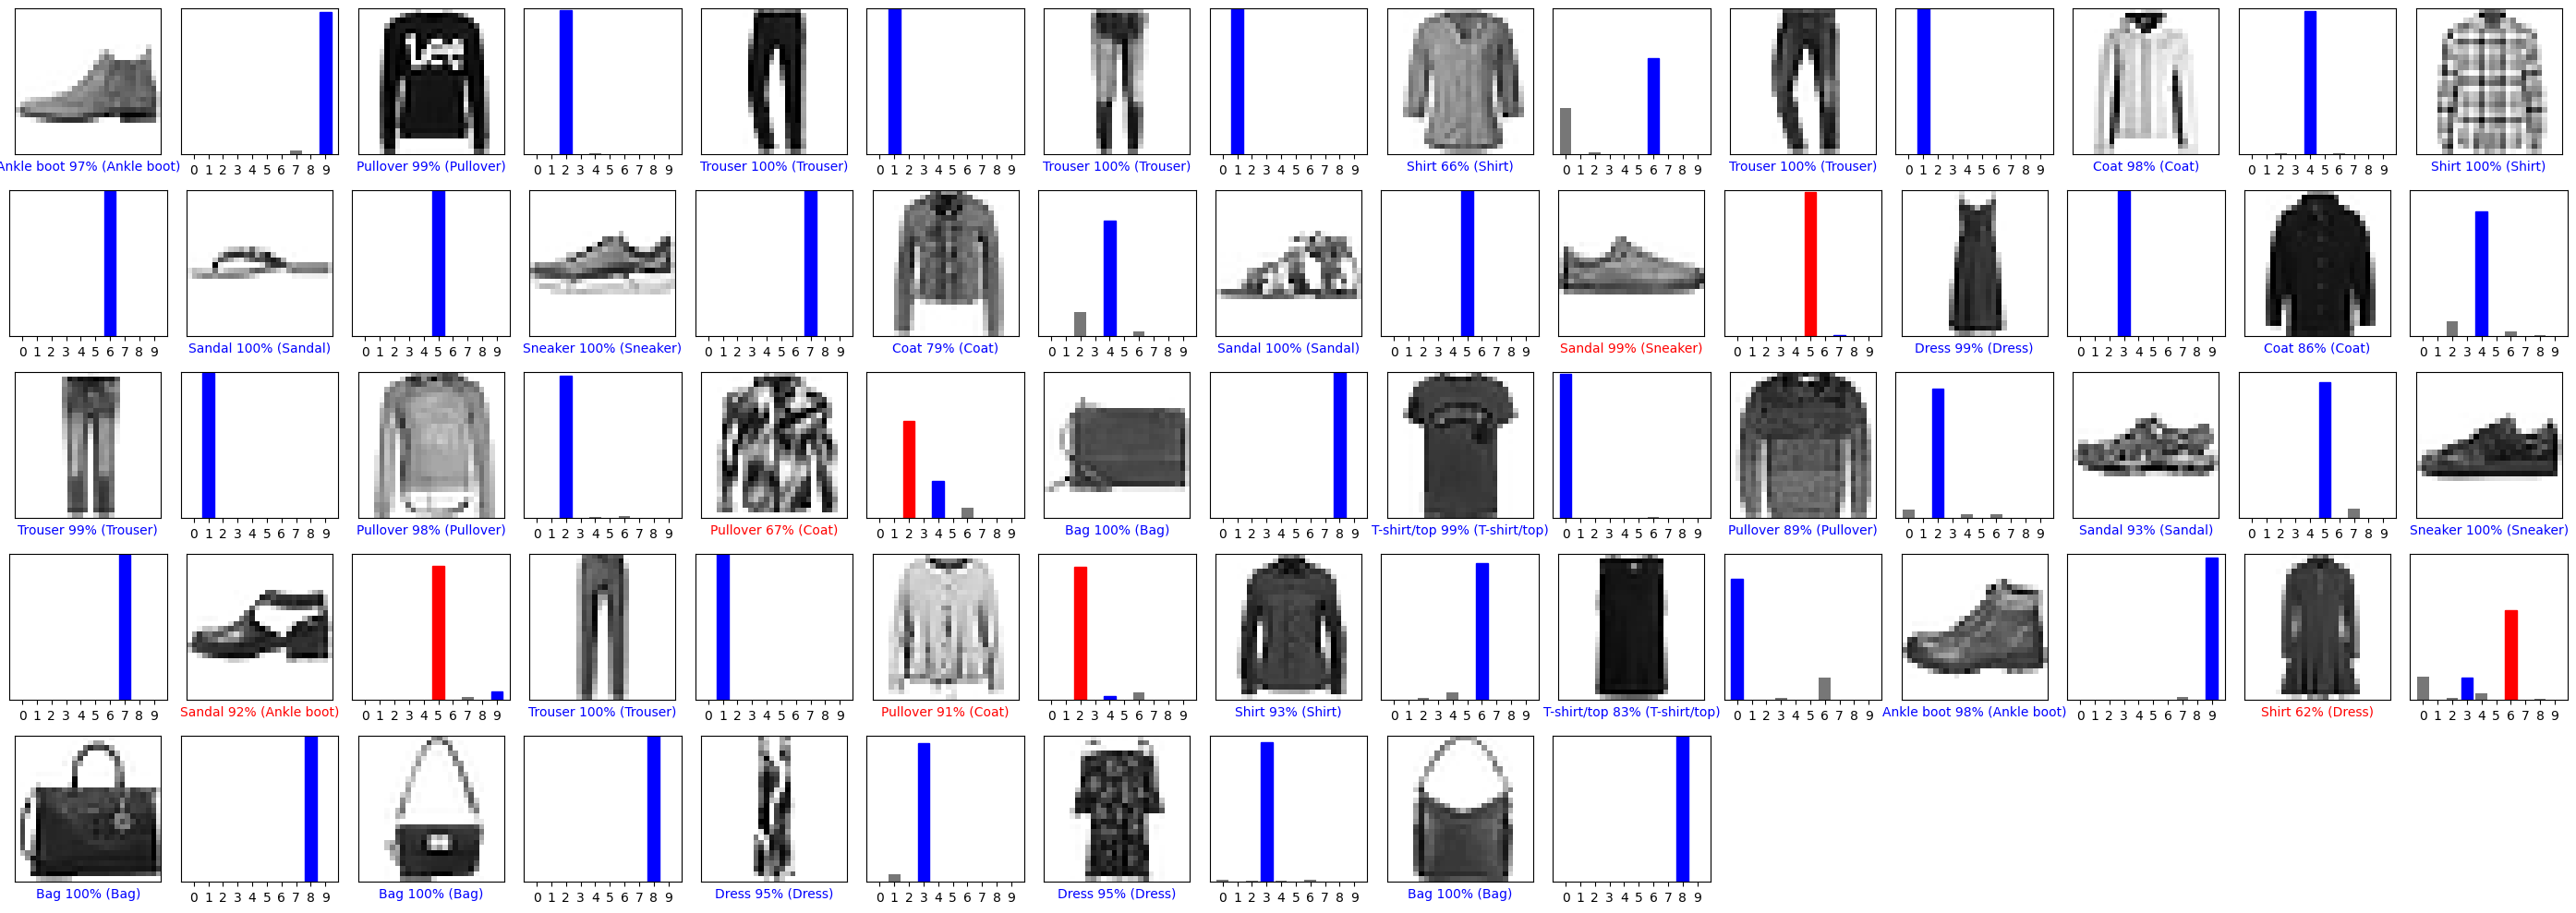

In [15]:

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
num_rows = 5
num_cols = 7
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols + 1, 2 * i + 1)
    plot_image(i, predictions, y_test_labels, X_test)
    plt.subplot(num_rows, 2 * num_cols + 1, 2 * i + 2)
    plot_value_array(i, predictions, y_test_labels)


    if i < num_images - 1:
        plt.subplot(num_rows, 2 * num_cols + 1, 2 * i + 3)


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols + 1, 2 * i + 1)
    plot_image(i, predictions2, y_test_labels, X_test)
    plt.subplot(num_rows, 2 * num_cols + 1, 2 * i + 2)
    plot_value_array(i, predictions2, y_test_labels)


    if i < num_images - 1:
        plt.subplot(num_rows, 2 * num_cols + 1, 2 * i + 3)


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

2.	Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке

In [16]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [17]:
import tensorflow as tf

In [18]:
tf.random.set_seed(42)
random_tensor = tf.random.uniform([2, 2])
print(random_tensor)

tf.Tensor(
[[0.6645621  0.44100678]
 [0.3528825  0.46448255]], shape=(2, 2), dtype=float32)


In [19]:
matrix = tf.constant([[1.0, 2.0], [2.0, 3.0]])
eigenvalues, eigenvectors = tf.linalg.eig(matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: tf.Tensor([-0.23606804+0.j  4.2360687 +0.j], shape=(2,), dtype=complex64)
Eigenvectors: tf.Tensor(
[[-0.85065085+0.j -0.52573115+0.j]
 [ 0.52573115+0.j -0.85065085+0.j]], shape=(2, 2), dtype=complex64)


In [20]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2 + x**10 + 10*x

dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(196846.0, shape=(), dtype=float32)


3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews


In [21]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalAveragePooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

In [22]:
max_words = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (25000, 200)
Shape of y_train: (25000,)


In [23]:
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, return_sequences=True))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 165s 410ms/step - accuracy: 0.7085 - loss: 0.5318 - val_accuracy: 0.8496 - val_loss: 0.3490
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 154s 393ms/step - accuracy: 0.9031 - loss: 0.2546 - val_accuracy: 0.8400 - val_loss: 0.4040
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 94s 240ms/step - accuracy: 0.9265 - loss: 0.1939 - val_accuracy: 0.8619 - val_loss: 0.3290
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 206ms/step - accuracy: 0.9444 - loss: 0.1571 - val_accuracy: 0.8224 - val_loss: 0.4294
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 208ms/step - accuracy: 0.9507 - loss: 0.1325 - val_accuracy: 0.8578 - val_loss: 0.3814


In [ ]:

predictions = model.predict(X_test)

predicted_classes = (predictions > 0.5).astype(int).flatten()


def display_predictions(reviews, true_labels, predicted_labels, num_examples=10):
    word_index = imdb.get_word_index()
    reverse_word_index = {value + 3: key for key, value in word_index.items()}

    for i in range(num_examples):
        review = " ".join([reverse_word_index.get(word_id, "?") for word_id in reviews[i]])
        print(f"Review: {review}\nTrue Label: {'Positive' if true_labels[i] == 1 else 'Negative'} | Predicted: {'Positive' if predicted_labels[i] == 1 else 'Negative'}\n")

display_predictions(X_test, y_test, predicted_classes, num_examples=10)


782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step
Review: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
True Label: Negative | Predicted: Negative

Review: psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of he

#CNN

1.	Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает

In [29]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [32]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import os
batch_size = 512
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
model_name = 'keras_cifar10_trained_model.h5'

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1686s 10us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [33]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

C:\Users\rylon\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))


model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
    model2.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.2,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    train_gen = datagen.flow(X_train,
                             y_train,
                             batch_size=batch_size)

    # запуск data augmentation через fit_generator
    model.fit(train_gen,
              epochs=epochs,
              validation_data=(X_test, y_test))
    model2.fit(train_gen,
              epochs=epochs,
              validation_data=(X_test, y_test))

Не используется data augmentation
Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.1027 - loss: 2.3082 - val_accuracy: 0.1190 - val_loss: 2.2968
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.1110 - loss: 2.2983 - val_accuracy: 0.1427 - val_loss: 2.2902
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.1258 - loss: 2.2892 - val_accuracy: 0.1609 - val_loss: 2.2765
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.1390 - loss: 2.2747 - val_accuracy: 0.1963 - val_loss: 2.2488
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 298ms/step - accuracy: 0.1602 - loss: 2.2439 - val_accuracy: 0.2344 - val_loss: 2.1938
Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.3811 - loss: 1.8754 - val_accuracy: 0.1000 - val_loss: 4.8620
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.6016 - loss: 1.1207 - val_accuracy: 0.1001 - val_loss: 4.5504
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6833 - los

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy Model 1:', test_acc)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy Model 2:', test_acc2)

313/313 - 2s - 7ms/step - accuracy: 0.2344 - loss: 2.1938

Test accuracy Model 1: 0.23440000414848328
313/313 - 7s - 21ms/step - accuracy: 0.6490 - loss: 1.0412

Test accuracy Model 2: 0.6489999890327454


2.	Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

Записей нет, мне было лень(просто много писать, проще рассказать, сори), расскажу сам